# Phase 1 Code Challenge Review 

_November 4, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [31]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [32]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# examine the dimensions of it
df.shape

(150, 5)

In [36]:
# check to see if you have missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [43]:
# introduce some missing values
df.iloc[2:4, 1:3] = np.nan

df.isnull().sum()

sepal_length    0
sepal_width     2
petal_length    2
petal_width     0
species         0
dtype: int64

In [ ]:
# drop them by certain columns


In [50]:
df.dropna(subset=['sepal_width'], axis = 0, inplace = True)

In [51]:
df.dropna(subset=['petal_length'], axis = 0, inplace = True)

In [52]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [53]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length'] * 10
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0
6,4.6,3.4,1.4,0.3,setosa,46.0


In [54]:
# another way?
df['sepal_length_10'] = df.sepal_length.apply(lambda x: x*10)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0
6,4.6,3.4,1.4,0.3,setosa,46.0


#### 2. Data Visualization

In [63]:
# how many species are there, and how many flowers are in each species
print(df.groupby(['species']).size())
print(df.species.value_counts())


species
setosa        48
versicolor    50
virginica     50
dtype: int64
versicolor    50
virginica     50
setosa        48
Name: species, dtype: int64


In [64]:
# let's plot the average pedal length for each species of iris 
avg_lengths = df.groupby(['species']).petal_length.mean()
avg_lengths

species
setosa        1.464583
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

Text(0.5, 0, 'species')

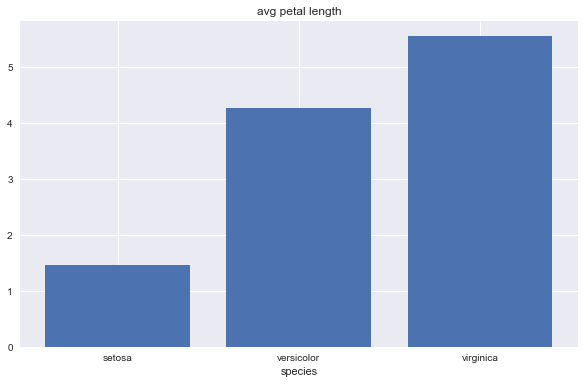

In [73]:
figure, ax = plt.subplots(figsize = (10,6))
x = avg_lengths.index
y = avg_lengths
ax.bar(x, y)
ax.set_title('avg petal length')
ax.set_xlabel('species')
# ax.set_xticks([0,1,2,])
# ax.set_xticklabels(['flower1','flower2','flower3'])

Text(0, 0.5, 'Height')

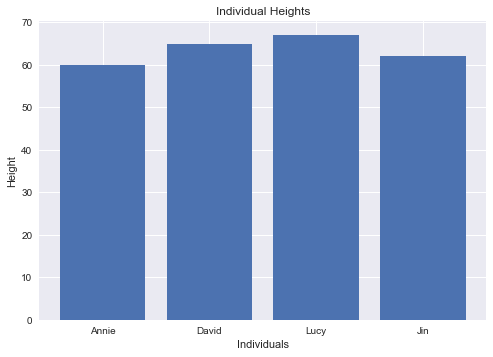

In [70]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)
plt.title('Individual Heights')
plt.xlabel('Individuals')
plt.ylabel('Height')

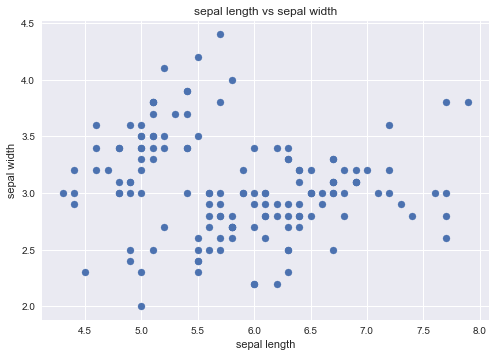

In [71]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [72]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.115181,0.868462,0.813257,1.000000
sepal_width,-0.115181,1.000000,-0.429917,-0.366791,-0.115181
petal_length,0.868462,-0.429917,1.000000,0.961985,0.868462
petal_width,0.813257,-0.366791,0.961985,1.000000,0.813257
sepal_length_10,1.000000,-0.115181,0.868462,0.813257,1.000000


Can you describe the relationship above?
Sepal length and width are slightly negatively correlated.

#### 3. Statistics 

In [74]:
# calculate the mean and median value for sepal length 
print(df['sepal_length'].mean())
print(df['sepal_length'].median())


5.859459459459461
5.8


In [ ]:
# what can you say about the distribution of sepal length and sepal width based on this distribution? 

#For sepal length, since the mean and median are relatively close together, the lengths are relatively evently distributed.
#Since the mean in slightly higher, the data is slightly skewed to the right.

In [90]:
# which flower has the longest pedal? what is the species of that flower
sorted_by_length = df.sort_values(by = 'petal_length', ascending = False)
sorted_by_length.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
118,7.7,2.6,6.9,2.3,virginica,77.0


#### 4. Python Data Structure 

In [15]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [16]:
# get the money 
get_money['get'][0]['get'][0]['get']

'money'

In [2]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [ ]:
# explore the structure of dictionary

In [9]:
# create a list of names containing all pets' names
# name_list = []
pet_names = list(groomer_info['pets'][0].keys())
pet_names



#['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [21]:
#  create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
type_list = []
for x in pet_names:
    type_list.append(groomer_info['pets'][0][x][0]['type'])
type_list



['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [25]:
# create a list that contain all pets age 
age_list = []
for pet in pet_names:
    age_list.append(groomer_info['pets'][0][pet][0]['age'])
    
age_list
    
    
    

[5, 1, 8, 2]

In [26]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(groomer_info, age):
    old_pets = []
    for pet_age in age_list:
        if pet_age > age:
            old_pets.append(pet_age)
    return old_pets

In [27]:
pets_older_than(groomer_info,4)
>>> ['Ginger','Joe Rogan']

['Ginger', 'Joe Rogan']

syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]